Mounted at /content/drive
1/1 [==============================] - 0s 471ms/step
Training Bernoulli Naive Bayes...
Performance metrics for Bernoulli Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.20      1.00      0.33         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5

    accuracy                           0.20        25
   macro avg       0.04      0.20      0.07        25
weighted avg       0.04      0.20      0.07        25

Accuracy: 0.2
Sensitivity: 0.2
Precision: 0.04
F1 Score: 0.06666666666666668



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

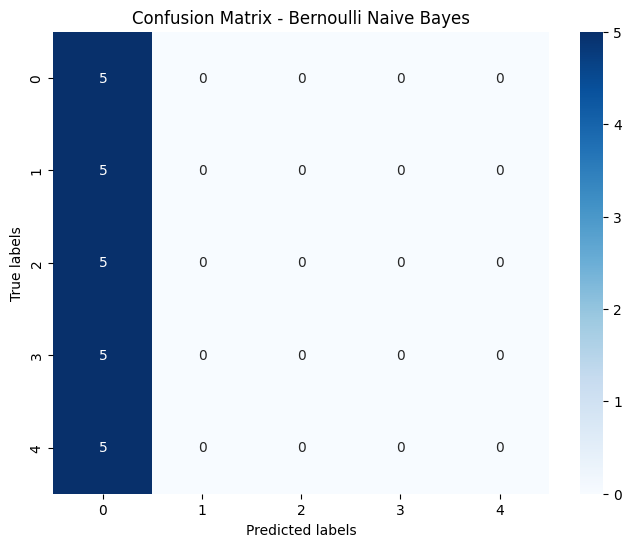

Training Multinomial Naive Bayes...
Performance metrics for Multinomial Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.40      0.36         5
           1       1.00      0.60      0.75         5
           2       0.60      0.60      0.60         5
           3       0.20      0.20      0.20         5
           4       0.83      1.00      0.91         5

    accuracy                           0.56        25
   macro avg       0.59      0.56      0.56        25
weighted avg       0.59      0.56      0.56        25

Accuracy: 0.56
Sensitivity: 0.5599999999999999
Precision: 0.5933333333333334
F1 Score: 0.5645454545454545



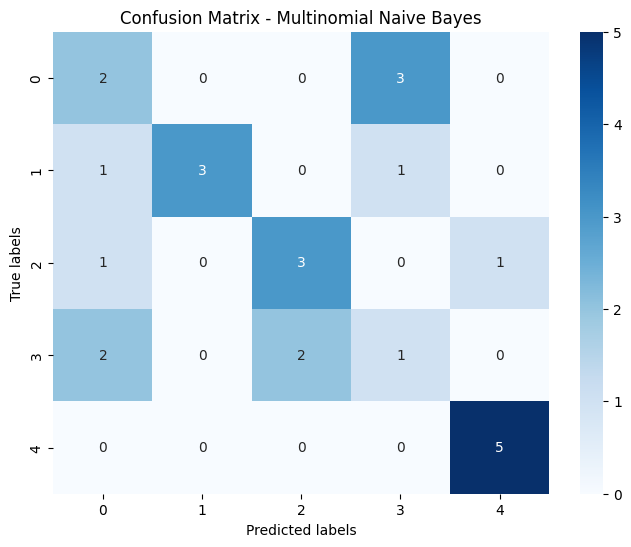

Training Complement Naive Bayes...
Performance metrics for Complement Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.75      0.60      0.67         5
           2       1.00      0.60      0.75         5
           3       0.25      0.20      0.22         5
           4       0.62      1.00      0.77         5

    accuracy                           0.60        25
   macro avg       0.62      0.60      0.59        25
weighted avg       0.62      0.60      0.59        25

Accuracy: 0.6
Sensitivity: 0.6
Precision: 0.625
F1 Score: 0.5907148407148407



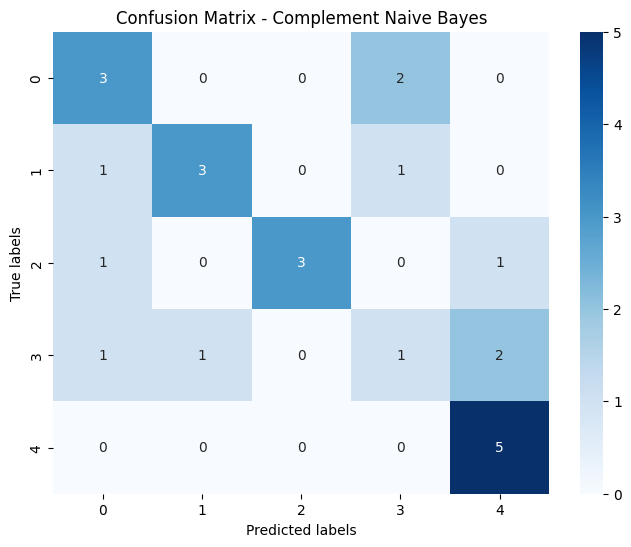

Training Gaussian Naive Bayes...
Performance metrics for Gaussian Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.75      0.60      0.67         5
           2       0.40      0.40      0.40         5
           3       0.00      0.00      0.00         5
           4       0.56      1.00      0.71         5

    accuracy                           0.48        25
   macro avg       0.44      0.48      0.45        25
weighted avg       0.44      0.48      0.45        25

Accuracy: 0.48
Sensitivity: 0.48
Precision: 0.4411111111111111
F1 Score: 0.4450793650793651



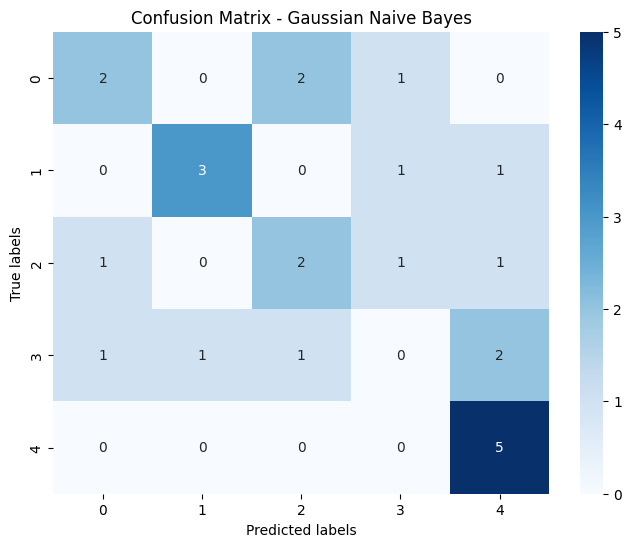

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/DR_50/Train'
test_dir = '/content/drive/MyDrive/DR_50/Test'
valid_dir = '/content/drive/MyDrive/DR_50/Valid'

# Image dimensions
img_width, img_height = 224, 224  # VGG16 input size
batch_size = 32
num_epochs = 20

# Load model for feature extraction
model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)  # Preprocess input according to the model requirements
    features = model.predict(img_data)
    return features

# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(train_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)

# Evaluate on test set
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)

# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# Scale the input features to the range [0, 1]
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Ensure non-negative values
min_value = np.min(np.concatenate([x_train_scaled, x_test_scaled]))
x_train_scaled_non_negative = x_train_scaled - min_value
x_test_scaled_non_negative = x_test_scaled - min_value

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train classifiers
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative, y_train)
    # Predict on test set
    y_pred = clf.predict(x_test_scaled_non_negative)
    # Print performance metrics
    print(f'Performance metrics for {clf_name}:')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}\n')
    # Plot confusion matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
